# Aula 6 - Árvore de decisão

- 1) Arvores de decisão
- 2) Árvores de Regressão;

____
____
____

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold, cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, f1_score, r2_score

from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, recall_score
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import GridSearchCV

## 1) O que é uma árvore de decisão

<img src="https://didatica.tech/wp-content/uploads/2020/07/image-3.png" width=500>

Fonte: https://didatica.tech/como-funciona-o-algoritmo-arvore-de-decisao/

<img src="https://web.tecnico.ulisboa.pt/ana.freitas/bioinformatics.ath.cx/bioinformatics.ath.cx/uploads/RTEmagicC_arv_dec4_01.gif.gif" width=500>

Fonte: http://web.tecnico.ulisboa.pt/ana.freitas/bioinformatics.ath.cx/bioinformatics.ath.cx/indexf23d.html?id



### Estrutura de uma árvore de decisão:

<img src="https://i1.wp.com/www.vooo.pro/insights/wp-content/uploads/2016/12/RDS-Vooo_insights-Tutorial_arvore_de_decisao_02.jpg?resize=640%2C371&ssl=1" width=600>


Fonte: https://www.vooo.pro/insights/um-tutorial-completo-sobre-a-modelagem-baseada-em-tree-arvore-do-zero-em-r-python/

#### Porque usar uma árvore: 

- Fácil interpretabilidade;
- Auxilia na exploração de dados;
- Traz um apelo visual.

##### Mas cuidado com o risco de overfitting!

# Inicialmente, vamos a uma aplicação!

In [2]:
# importe as principais bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# desabilita os warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("datasets/breast_cancer.csv")
df.shape

(569, 33)

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
X = df.select_dtypes(include = np.number)
y = df["diagnosis"]

In [7]:
X = X.drop(columns=['id', 'Unnamed: 32'])

In [8]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y)

In [11]:
y_train.value_counts(normalize = True)

B    0.626374
M    0.373626
Name: diagnosis, dtype: float64

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [14]:
y_pred = dtc.predict(X_test)

In [15]:
# Olhando para o classification report 

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.96      0.96      0.96        72
           M       0.93      0.93      0.93        42

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



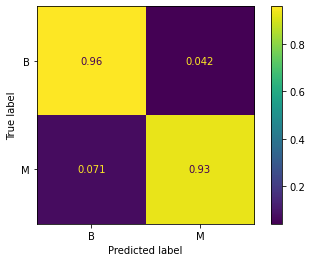

In [16]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize = 'true')

# O que acontece realmente com a árvore?

__Exemplo__

Digamos que uma amostra de 30 alunos tem duas variáveis: Sexo (menino ou menina), Turma (IX ou X). 

Digamos também que 15 destes 30 jogam tênis no recreio. 

Queremos separar os alunos: quem **joga tênis** e quem **não joga tênis**


Toda árvore começa pelo nó raiz, então, uma pergunta natural é: **qual feature utilizamos para fazer a quebra do nó raiz: sexo ou turma?**

Há duas quebras possíveis:

<img src="https://i2.wp.com/www.vooo.pro/insights/wp-content/uploads/2016/12/RDS-Vooo-Tutorial_completo_arvore_decisao_03.jpg?resize=617%2C293&ssl=1" width=500>

Vemos que, **dependendo da feature que utilizamos pra fazer a quebra**, conseguimos **graus de separações diferentes dos dados com relação ao target**:


<table>
<thead>
  <tr>
    <th colspan="4"><center>Sexo</center></th>
  </tr>
</thead>
<tbody>
  <tr>
    <td colspan="2"><center>Meninas</center></td>
    <td colspan="2"><center>Meninos</center></td>
  </tr>
  <tr>
    <td><center>jogam tênis</center></td>
    <td><center>NÃO jogam tênis</center></td>
    <td><center>jogam tênis</center></td>
    <td><center>NÃO jogam tênis</center></td>
  </tr>
  <tr>
    <td><center>2</center></td>
    <td><center>8</center></td>
    <td><center>13</center></td>
    <td><center>7</center></td>
  </tr>
  <tr>
    <td colspan="2"><center>10</center></td>
    <td colspan="2"><center>20</center></td>
  </tr>
</tbody>
</table>


<table>
<thead>
  <tr>
    <th colspan="4"><center>classe</center></th>
  </tr>
</thead>
<tbody>
  <tr>
    <td colspan="2"><center>IX</center></td>
    <td colspan="2"><center>X</center></td>
  </tr>
  <tr>
    <td><center>jogam tênis</center></td>
    <td><center>NÃO jogam tênis</center></td>
    <td><center>jogam tênis</center></td>
    <td><center>NÃO jogam tênis</center></td>
  </tr>
  <tr>
    <td><center>6</center></td>
    <td><center>8</center></td>
    <td><center>9</center></td>
    <td><center>7</center></td>
  </tr>
  <tr>
    <td colspan="2"><center>14</center></td>
    <td colspan="2"><center>16</center></td>
  </tr>
</tbody>
</table>

Como decidir qual das quebrar acima **separou melhor os dados com relação ao target?**

Matematicamente, o modelo pode usar dois critérios diferentes para decidir como fazer as quebras na árvore: o **critério de Gini** ou o **critério da entropia**.

______

**Critério de Gini**

A **impureza de Gini** mede o quão "impuras" são as folhas das árvores construídas após as quebras nos nós. O coeficiente é dado por:

$$Gini(D) = 1 - \sum{p_{i}^2}$$

Onde $p_i$ são as **proporções** de separação do target em cada quebra.

Aqui estaremos interessados **em como a impureza muda após as quebras**. Nosso objetivo será **maximizar a purificação proporcionada pela quebra nos nós** -- mais precisamente, estamos interessados em determinar **qual é a quebra que proporciona a maior purificação**.

- **Impureza antes da divisão**: Como não havia separação alguma, a impureza era dada simplesmente pelo balanço natural dos dados: 

$$G(\text{pré-divisão}) = 1 - ((15/30)^2 + (15/30)^2) = 0.5$$

Temos duas quebras possíveis:

- Divisão por **sexo**: após a divisão dos dados pela feature **sexo**, passamos a ter as seguintes impurezas, segundo a tabela acima: 

    - $G(\text{meninas}) = 1 - (\frac{2}{10}^2 + \frac{8}{10}^2) = 0.319$
    
    - $G(\text{meninos}) = 1 - ( \frac{13}{20}^2 + \frac{7}{20}^2) = 0.454$
    
    Ou seja, após a divisão, a impureza total passa a ser a média ponderada: 
    
    <br>
    
    - $G(\text{pós-divisão}) = \frac{10}{30} \times G(\text{meninas}) + \frac{20}{30} \times G(\text{meninos})
    = 0.33 \times 0.319 + 0.66 \times 0.454
    = 0.40491$
    

<!-- Assim, **a perda de impureza proporcionada pela quebra** dos dados segundo a feature **sexo** é de:

- $\Delta G_{\text{sexo}} = G(\text{pré-divisão}) - G(\text{pós-divisão}) = 0.5 - 0.40491 = $ **0.095** -->

- Divisão por **classe**: após a divisão dos dados pela feature **classe**, passamos a ter as seguintes impurezas, segundo a tabela acima:

    - $G(\text{IX}) = 1 - (\frac{6}{14}^2 + \frac{8}{14}^2) = 0.489$
    
    - $G(\text{X}) = 1 - ( \frac{9}{16}^2 + \frac{7}{16}^2) = 0.492$
    
    Ou seja, após a divisão, a impureza total passa a ser a média ponderada: 
    
    <br>
    
    - $G(\text{pós-divisão}) = \frac{14}{30} \times G(\text{IX}) + \frac{16}{30} \times G(\text{X})
    = 0.46 \times 0.489 + 0.53 \times 0.492
    = 0.4857$
    

<!-- Assim, **a perda de impureza proporcionada pela quebra** dos dados segundo a feature **classe** é de:
    
- $\Delta G_{\text{classe}} = G(\text{pré-divisão}) - G(\text{pós-divisão}) = 0.5 - 0.4857 = $ **0.014**  -->

 
Agora, como escolher a melhor quebra?

> O **critério de Gini** consiste em **escolher a quebra que proporciona a maior purificação** | **menor grau de impureza**.

Assim, a divisão a ser escolhida seria por **sexo**. 

Depois, aplica-se o mesmo procedimento para os nós resultantes.

_________

**Critério de entropia**

A **entropia** é uma quantidade definida em física e teoria da informação com o objetivo de quantificar **o grau de desordem de um sistema**, ou também, uma medidad da aleatoriedade (impureza) de uma variável.

A entropia é dada por:

 $$E = -\sum{p_{i} \log_{2}{p_{i}}}$$
 
Onde $p_i$ são as **proporções** de separação do target em cada quebra.

O objetivo é o mesmo: Encontrar o menor grau de impureza.
 
Temos duas quebras possíveis:

- Divisão por sexo: 

    - $E(\text{meninas}) = -1 \times (\frac{2}{10} \log_{2}\frac{2}{10} + \frac{8}{10} \log_{2}\frac{8}{10}) = 0.721$
    - $E(\text{meninos}) = -1 \times (\frac{13}{20} \log_{2}\frac{13}{20} + \frac{7}{20} \log_{2}\frac{7}{20}) = 0.934$
    
    A entropia ponderada após a divisão por **sexo** é:
    
    <br>
    
    - $E(\text{pós-divisão}) = \frac{10}{30} \times E(\text{meninas}) + \frac{20}{30} \times E(\text{meninos}) =  0.863$
    
    
    <br>
    

<br>

- Divisão por classe:

    - $E(\text{IX}) = -1 \times (\frac{6}{14} \log_{2}\frac{6}{14} + \frac{8}{14} \log_{2}\frac{8}{14}) = 0.985$
    - $E(\text{X}) = -1 \times (\frac{9}{16} \log_{2}\frac{9}{16} + \frac{7}{16} \log_{2}\frac{7}{16}) = 0.988$
    
    A entropia ponderada após a divisão por **turma** é:
    
    <br>
    
    - $E(\text{pós-divisão}) = \frac{10}{30} \times E(\text{IX}) + \frac{20}{30} \times E(\text{X}) =  0.986$
    
    
    <br>
    


Também pela entropia, a divisão a ser escolhida seria por **sexo**. 

Depois, aplica-se o mesmo procedimento para os nós resultantes, até obter-se nós puros.

Uma coisa importante se se pontuar sobre as arvores de decisão é que elas são sensíveis ao overfitting

In [17]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [18]:
y_pred_dtc = dtc.predict(X_test)

y_pred_dtc_train = dtc.predict(X_train)

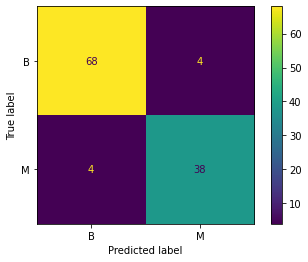

In [19]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dtc)

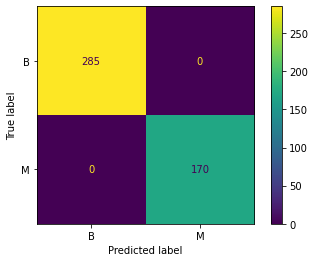

In [20]:
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_dtc_train)

In [22]:
print(classification_report(y_train, y_pred_dtc_train))

              precision    recall  f1-score   support

           B       1.00      1.00      1.00       285
           M       1.00      1.00      1.00       170

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



In [21]:
print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           B       0.94      0.94      0.94        72
           M       0.90      0.90      0.90        42

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



Temos um claro overfitting! 

Por que isso pode ter acontecido? Vamos discutir mais sobre isso adiante, mas o fato é que o método de árvore de decisão é um método notoriamente **propenso a overfitting**.

Para entender o porquê, vamos dar uma olhada na árvore treinada!

__Visualizando a árvore de decisão__

É possível visualizar a árvore de decisão criada com o próprio sklearn!

Para isso, basta usar a função `plot_tree()` do sub-módulo tree, conforme abaixo!

Para mais detalhes sobre como plotar a árvore, [clique aqui](https://scikit-learn.org/stable/modules/tree.html#tree)

In [23]:
from sklearn.tree import plot_tree

In [24]:
X.columns[27]

'concave points_worst'

Obs.: vou deixar os plots comentados pra não pesar no notebook.

In [125]:
# fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(18, 18), dpi=300)

# plot_tree(dtc)

# fig.savefig("arvore1.png")

In [127]:
# fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(18, 18), dpi=500)

# plot_tree(dtc, feature_names=X_train.columns, class_names=y_train.unique())

# fig.savefig("arvore1.png")

In [131]:
# fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(18, 18))

# plot_tree(dtc, feature_names=X_train.columns, max_depth=3)

Temos uma árvore **muito profunda**, o que implica em um **modelo muito complexo**.

De fato, se imaginarmos a hipótese como uma função definida por partes, quanto mais quebras, mais partes, o que torna a hipótese mais complexa, e, portanto, mais propensa a overfitting!

Uma visualização do que acontece com o espaço de features:

<img src=https://paulvanderlaken.files.wordpress.com/2020/03/readme-titanic_plot-11.png width=500>

In [29]:
X_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
91,15.37,22.76,100.20,728.2,0.09200,0.10360,0.11220,0.07483,0.1717,0.06097,...,16.43,25.84,107.50,830.9,0.1257,0.19970,0.28460,0.14760,0.2556,0.06828
368,21.71,17.25,140.90,1546.0,0.09384,0.08562,0.11680,0.08465,0.1717,0.05054,...,30.75,26.44,199.50,3143.0,0.1363,0.16280,0.28610,0.18200,0.2510,0.06494
84,12.00,15.65,76.95,443.3,0.09723,0.07165,0.04151,0.01863,0.2079,0.05968,...,13.67,24.90,87.78,567.9,0.1377,0.20030,0.22670,0.07632,0.3379,0.07924
471,12.04,28.14,76.85,449.9,0.08752,0.06000,0.02367,0.02377,0.1854,0.05698,...,13.60,33.33,87.24,567.6,0.1041,0.09726,0.05524,0.05547,0.2404,0.06639
238,14.22,27.85,92.55,623.9,0.08223,0.10390,0.11030,0.04408,0.1342,0.06129,...,15.75,40.54,102.50,764.0,0.1081,0.24260,0.30640,0.08219,0.1890,0.07796


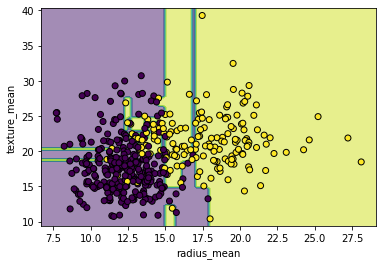

In [73]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay
iris = load_iris()
X = X_train[["radius_mean", "texture_mean"]]
classifier = DecisionTreeClassifier().fit(X, y_train)
disp = DecisionBoundaryDisplay.from_estimator(
    classifier, X, response_method="predict",
    xlabel=X.columns[0], ylabel=X.columns[1],
    alpha=0.5,
)
disp.ax_.scatter(X["radius_mean"], X["texture_mean"], c=[1 if x == "M" else 0 for x in y_train], edgecolors="k")
plt.show()

Antes de avançarmos na direção de melhoria deste cenário, vamos parar e entender um pouco mais a fundo como que o estimador de árvore de decisão funciona!

_______

E, além do critério pro split, temos alguns outros hiperparâmetros muito importantes para a árvore de decisão, sobretudo no que diz respeito à sua **regularização**: `max_depth`, `min_samples_split`, `min_samples_leaf`, `max_leaf_nodes`, `min_impurity_decrease`

 - max_depth: Maxima profundidade;
 - min_samples_split: minimo de amostras para realizar um split;
 - min_samples_leaf: minimo de amostras necessarias para ter uma folha;
 - min_impurity_decrease: menor grau de impureza para realizar um split;

Vamos então treinar um modelo melhor?

Vamos usar o que aprendemos na aula passada e já usar o Grid Search!

_________________

In [74]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [75]:
# ============================================
# pipe com só uma etapa (modelagem), pq nao fizemos nada de preprocessamento

pipe = Pipeline([("dt", DecisionTreeClassifier(random_state=42))])

# ============================================

params_grid_dt = {"dt__criterion" : ["gini", "entropy"],
                  "dt__splitter" : ["best", "random"],
                  "dt__max_depth" : range(2, 11)} 

splitter = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_dt = GridSearchCV(estimator=pipe,
                       param_grid=params_grid_dt,
                       scoring="f1_weighted",
                       cv=splitter,
                       verbose=10)

grid_dt.fit(X_train, y_train)

# ============================================

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5; 1/36] START dt__criterion=gini, dt__max_depth=2, dt__splitter=best.....
[CV 1/5; 1/36] END dt__criterion=gini, dt__max_depth=2, dt__splitter=best;, score=0.891 total time=   0.0s
[CV 2/5; 1/36] START dt__criterion=gini, dt__max_depth=2, dt__splitter=best.....
[CV 2/5; 1/36] END dt__criterion=gini, dt__max_depth=2, dt__splitter=best;, score=0.956 total time=   0.0s
[CV 3/5; 1/36] START dt__criterion=gini, dt__max_depth=2, dt__splitter=best.....
[CV 3/5; 1/36] END dt__criterion=gini, dt__max_depth=2, dt__splitter=best;, score=0.956 total time=   0.0s
[CV 4/5; 1/36] START dt__criterion=gini, dt__max_depth=2, dt__splitter=best.....
[CV 4/5; 1/36] END dt__criterion=gini, dt__max_depth=2, dt__splitter=best;, score=0.945 total time=   0.0s
[CV 5/5; 1/36] START dt__criterion=gini, dt__max_depth=2, dt__splitter=best.....
[CV 5/5; 1/36] END dt__criterion=gini, dt__max_depth=2, dt__splitter=best;, score=0.923 total time=   0.0

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('dt',
                                        DecisionTreeClassifier(random_state=42))]),
             param_grid={'dt__criterion': ['gini', 'entropy'],
                         'dt__max_depth': range(2, 11),
                         'dt__splitter': ['best', 'random']},
             scoring='f1_weighted', verbose=10)

In [76]:
grid_dt.best_params_

{'dt__criterion': 'entropy', 'dt__max_depth': 6, 'dt__splitter': 'random'}

In [77]:
y_pred_test_cv = grid_dt.predict(X_test)
y_pred_train_cv = grid_dt.predict(X_train)

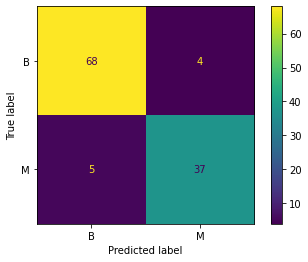

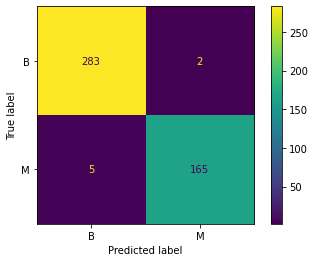

In [78]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_cv)
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train_cv)

Muito melhor, não é mesmo! E longe de estar overfitado!

Veja, como o modelo agora está bem mais simples:

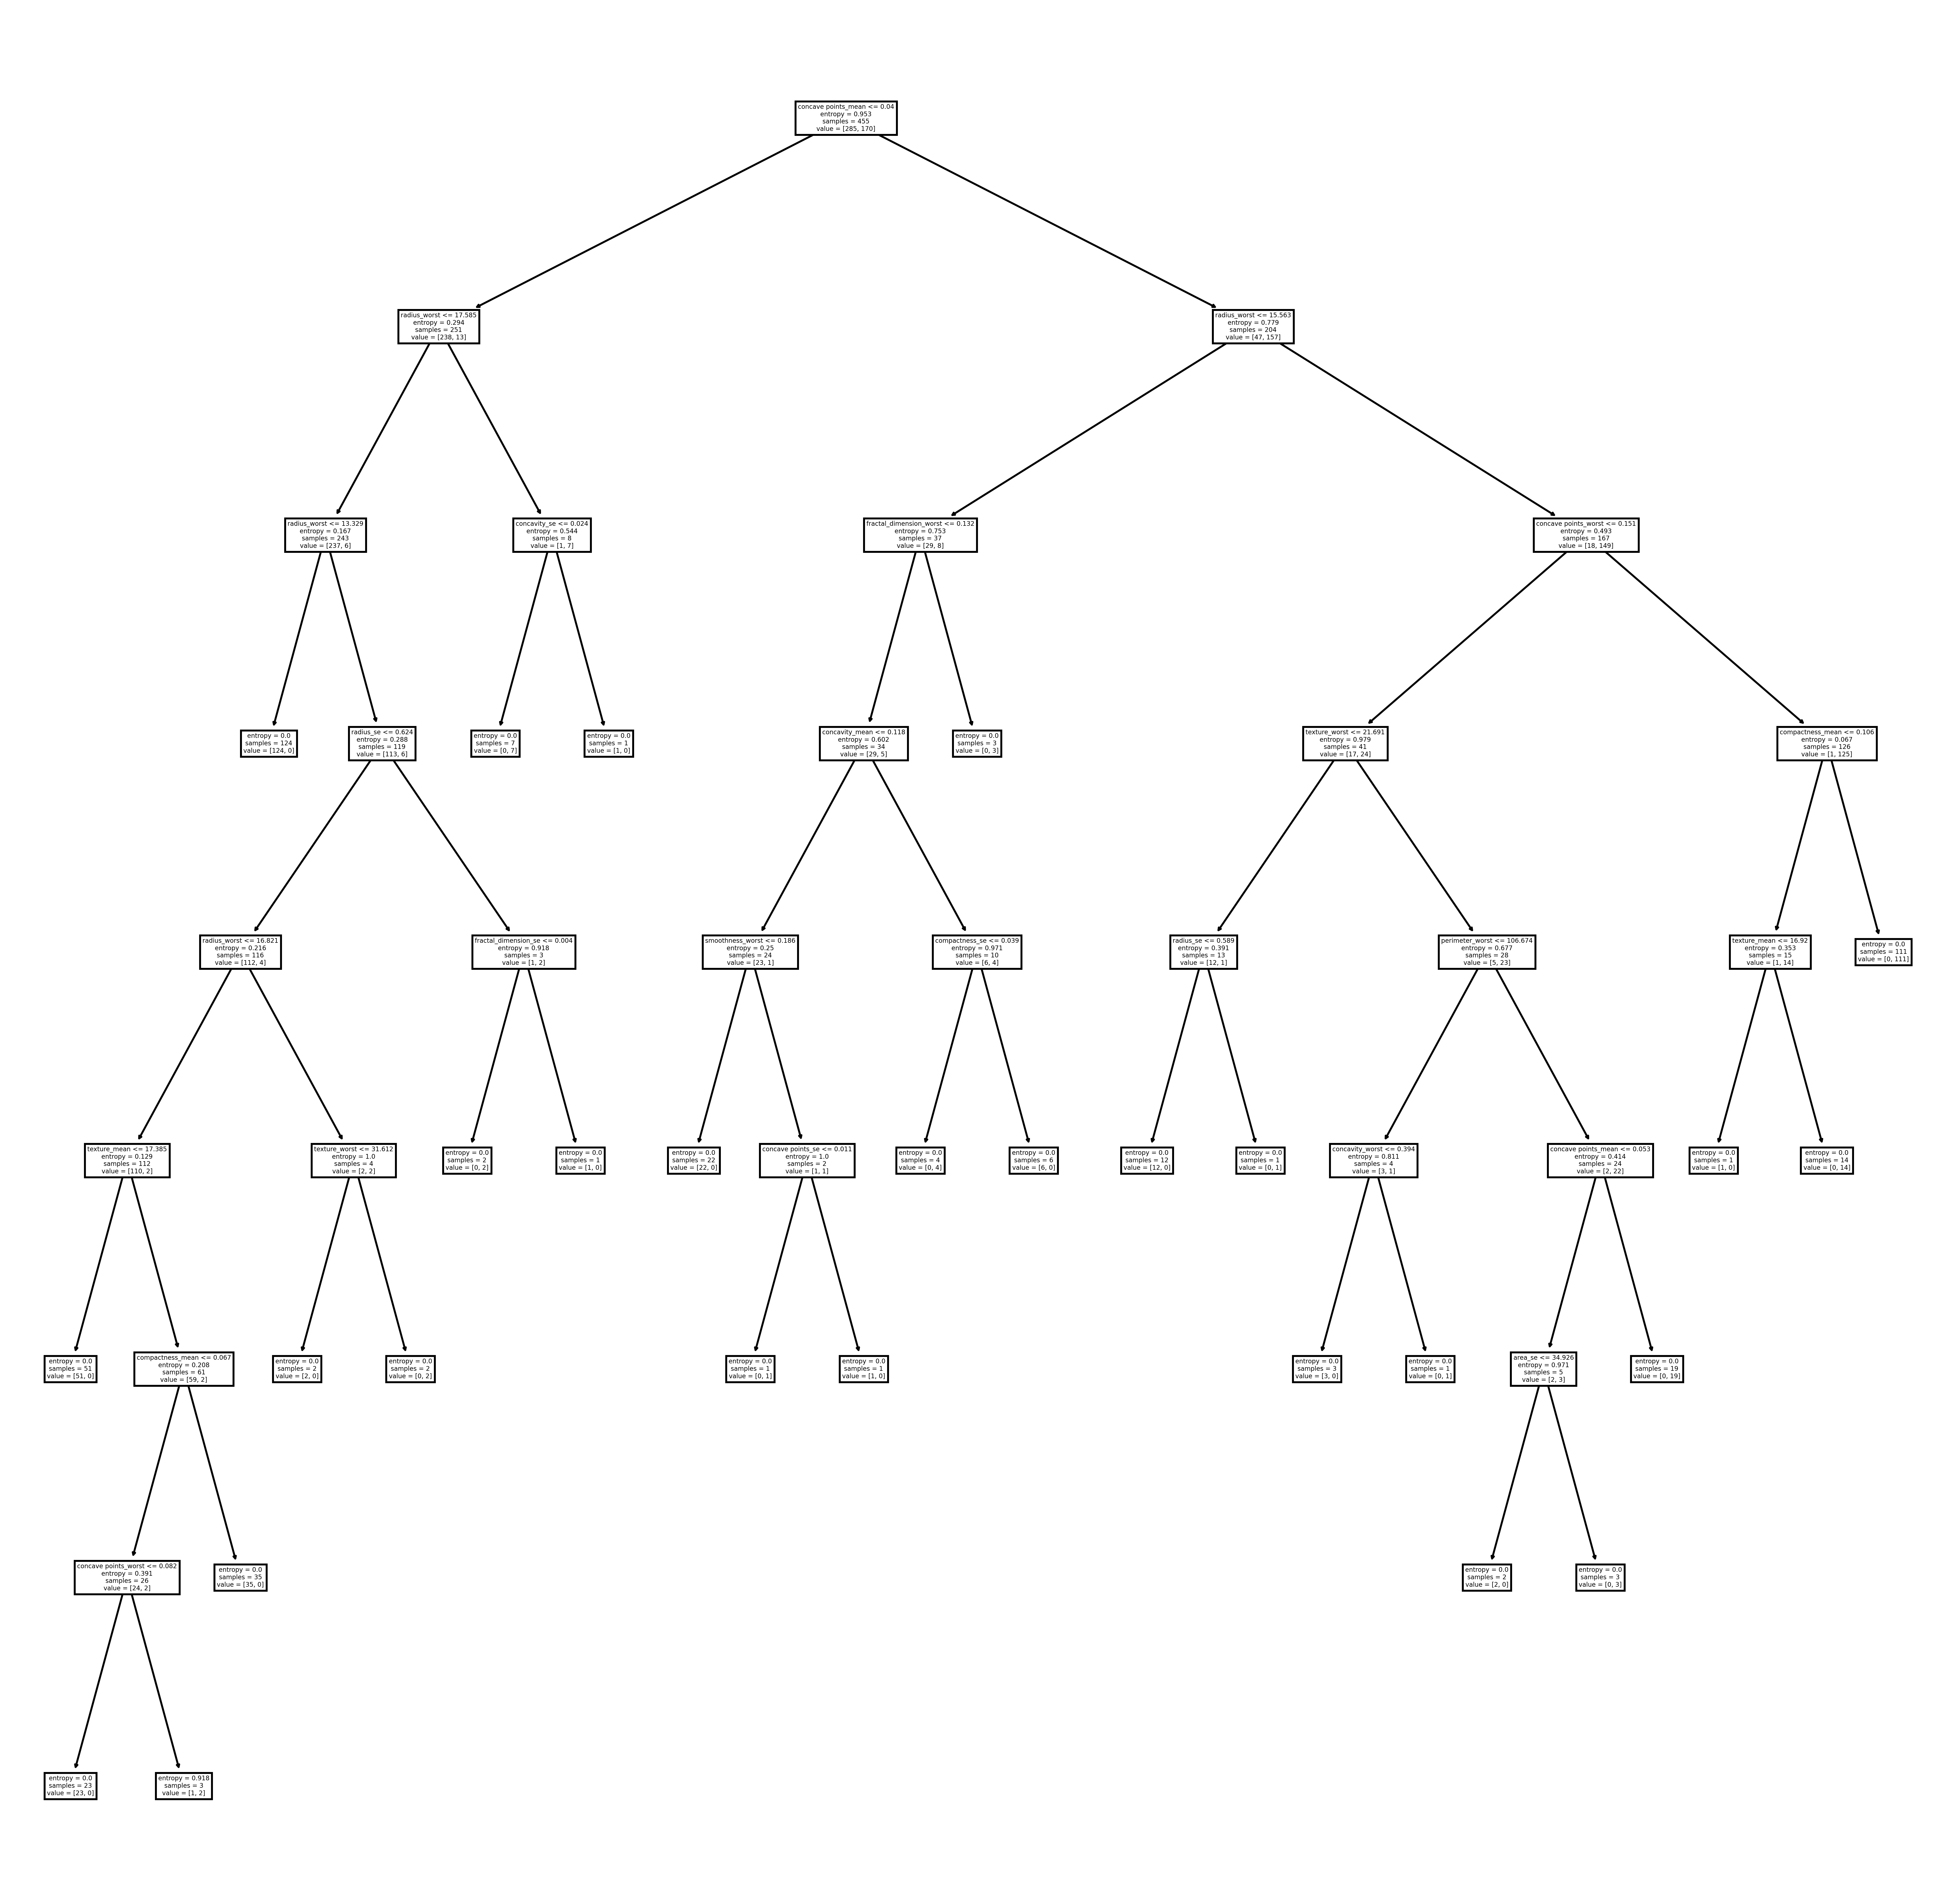

In [141]:
# fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(18, 18), dpi=500)

# # note que temos que passar o objeto da árvore, que está dentro do objeto do grid search!
# plot_tree(grid_dt.best_estimator_["dt"], feature_names=X_train.columns)

# fig.savefig("arvore_regularizada.png")

_________

## 2) Árvores de regressão

Alguns algoritmos de classificação podem ser utilizados como algoritmos de regressão, inclusive árvores de decisão!

As **árvores de regressão** consistem em funções com valores discretos, similar a uma escada, onde cada degrau é o valor de uma folha. [Aqui](https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html) há detalhes sobre a classe do sklearn; e [aqui](https://www.youtube.com/watch?v=g9c66TUylZ4) está o StatQuest sobre árvores de regressão!

Considere o seguinte dataset:

<img src='https://s3-sa-east-1.amazonaws.com/lcpi/800a4332-e709-4ea3-8c24-959c05c8fd65.png' width=500>

O algoritmo irá obter os valores do target como sendo **a média dos valores de cada folha da árvore final**. 

Visualmente: 

<img src='https://s3-sa-east-1.amazonaws.com/lcpi/64cb4edd-20e1-486a-8fc9-60e60e1485d5.png' width=500>

Para a escolha das melhores divisões: 

- o algoritmo percorre a média entre cada par de pontos das features; 
- define estes valores como divisões (sequencialmente); 
- para cada divisão experimentada, o algoritmo calcula o MSE;
- a melhor divisão é aquela que apresentar o menor erro!

Visualmente:

<img src='https://s3-sa-east-1.amazonaws.com/lcpi/be58ac8b-5c59-4b9f-be79-e000d060e9e3.png' width=500>

<img src='https://s3-sa-east-1.amazonaws.com/lcpi/1f317afd-6119-41a5-849d-cee038403cf2.png' width=500>

## Exercício

Fazer um modelo de árvore de regressão para precificação de casas!

A classe é [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

# Salvar modelos

Caso queira usar os modelos criados no futuro, é possível usar a biblioteca "joblib":

In [28]:
# from joblib import dump, load
# dump(grid_dtr, 'modelo_dtr.joblib') 